In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import tweepy
import csv
import re
import os
import glob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


In [2]:
#Access twitter keys
keys = pd.read_csv(r'/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/Twitter_Keys.txt')

In [3]:
#Assign Keys
consumer_key = keys.loc[2].item()
consumer_secret = keys.loc[3].item()
access_token = keys.loc[4].item()
access_token_secret = keys.loc[5].item()

In [4]:
#Authenticate Keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:

#Scrape tweets using snscrape with a Python Wrapper
def scrape_tweets(outpath_name):
    col =["tweet_id","tweet.date","tweet.username","tweet.content"]
    df = pd.DataFrame(columns=col)
    df

    maxTweets = 5000#0  #the number of tweets you require; change per your needs
    keyword = "Endsars "
    date = 'since:2017-01-01 until:2020-10-18  exclude:retweets' #change dates as per need

    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keyword + date).get_items()):
        if i > maxTweets :
            break
        tmp = pd.Series([tweet.id, tweet.date, tweet.username, tweet.content], index=df.columns)
        df = df.append(tmp, ignore_index=True)

    df

    #Extracting User Locations using tweepy
    username = list(df['tweet.username'])

    def location(user):
        userr = api.get_user(user)
        return userr.location
        pass  

    locationss = [location(user) for user in username]
    df['location'] = locationss #merge location with df

    #Write file to directory
    df.to_csv('/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/{}.csv'.format(outpath_name))
    
    #Check if file exists in directory 
    directory = glob.glob('/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/*')
    data = '/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/{}.csv'.format(outpath_name)
    return 'File downloaded' if data in  directory else print('File not in working directory')  
    pass


In [6]:
scrape_tweets('EndSars1')

<ipython-input-5-e054e6787be5>:14: FutureWarning: username is deprecated, use user.username instead
  tmp = pd.Series([tweet.id, tweet.date, tweet.username, tweet.content], index=df.columns)
Rate limit reached. Sleeping for: 703
Rate limit reached. Sleeping for: 705
Rate limit reached. Sleeping for: 690
Rate limit reached. Sleeping for: 705
Rate limit reached. Sleeping for: 699


'File downloaded'

In [9]:
#Read downloaded file
df = pd.read_csv('/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/EndSars1.csv')
df

,tweet_id,tweet.date,tweet.username,tweet.content,location
0,1.317620e+18,2020-10-17 23:59:59+00:00,Dessey_24,#EndSARS #ENDBADGOVERNANCE https://t.co/QwTvuG...,"Hatfield, England"
1,1.317620e+18,2020-10-17 23:59:59+00:00,flakiedoodles,@yinkussie What year was this. How am I just h...,NaN
2,1.317620e+18,2020-10-17 23:59:59+00:00,BigZugo,@shesfiery @Deji4PF #EndSARS,Planet Earth
3,1.317620e+18,2020-10-17 23:59:59+00:00,temmy_turner,A video that lives in my head rent free IYKYK ...,"Baltimore, MD"
4,1.317620e+18,2020-10-17 23:59:59+00:00,tom_tommisk,#EndSARS,"Lagos, Nigeria"
...,...,...,...,...,...
4996,1.317610e+18,2020-10-17 23:44:13+00:00,abayopaul,There have been many demands and I also agree ...,"Abuja, Nigeria"
4997,1.317610e+18,2020-10-17 23:44:13+00:00,OBC_IB,#EndSars #EndPoliceBrutality https://t.co/yDDy...,Ghetto
4998,1.317610e+18,2020-10-17 23:44:13+00:00,mz_cruise,12:43am a good time to #EndSARS #EndBadGovernm...,"Lagos, Nigeria"
4999,1.317610e+18,2020-10-17 23:44:13+00:00,officialpraised,@idolshelpffxofi @Anon11242 #endSARS \nMake s...,unknown


In [10]:
df = df.fillna('NA')
df

,tweet_id,tweet.date,tweet.username,tweet.content,location
0,1.317620e+18,2020-10-17 23:59:59+00:00,Dessey_24,#EndSARS #ENDBADGOVERNANCE https://t.co/QwTvuG...,"Hatfield, England"
1,1.317620e+18,2020-10-17 23:59:59+00:00,flakiedoodles,@yinkussie What year was this. How am I just h...,NA
2,1.317620e+18,2020-10-17 23:59:59+00:00,BigZugo,@shesfiery @Deji4PF #EndSARS,Planet Earth
3,1.317620e+18,2020-10-17 23:59:59+00:00,temmy_turner,A video that lives in my head rent free IYKYK ...,"Baltimore, MD"
4,1.317620e+18,2020-10-17 23:59:59+00:00,tom_tommisk,#EndSARS,"Lagos, Nigeria"
...,...,...,...,...,...
4996,1.317610e+18,2020-10-17 23:44:13+00:00,abayopaul,There have been many demands and I also agree ...,"Abuja, Nigeria"
4997,1.317610e+18,2020-10-17 23:44:13+00:00,OBC_IB,#EndSars #EndPoliceBrutality https://t.co/yDDy...,Ghetto
4998,1.317610e+18,2020-10-17 23:44:13+00:00,mz_cruise,12:43am a good time to #EndSARS #EndBadGovernm...,"Lagos, Nigeria"
4999,1.317610e+18,2020-10-17 23:44:13+00:00,officialpraised,@idolshelpffxofi @Anon11242 #endSARS \nMake s...,unknown


In [11]:
#Clean Tweets
#Retrieve tweet content column
tweets = df['tweet.content'].to_list()
tweets[:10]

['#EndSARS #ENDBADGOVERNANCE https://t.co/QwTvuGx9ak',
 '@yinkussie What year was this. How am I just hearing?! 🙆🏿\u200d♀️🙆🏿\u200d♀️🙆🏿\u200d♀️ #Endsars',
 '@shesfiery @Deji4PF #EndSARS',
 'A video that lives in my head rent free IYKYK #EndSARS https://t.co/C4Z1BDXCZ0',
 '#EndSARS',
 '@OgbeniDipo #EndSARS',
 '@K1Says @Difftypeofpesen @jidesanwoolu We need to ask @jidesanwoolu this question every morning till he can give us an answer \n\n@jidesanwoolu HAS HE BEEN ARRESTED? \n\n#EndSARS',
 'Our voices must be heard!! \n#EndSARS https://t.co/e9geURpJXd',
 "@EndSarsResponse @iAmNiyola Make sure you are following back. \n\nOnline #Protesters lets get connected ❤️❤️❤️\n\nI will follow &amp; I retweet of your post 🔥🔥🔥\n\nLet's #EndSARS #EndSarsNow #EndSWAT #SecureNorth together https://t.co/NOKPbbHMbT",
 '@TIME Whatever Just #EndSARS']

In [12]:
#Remove URLs, lower case the words, and remove stop and collection words from the tweets.
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [13]:
#Remove URLs 
tweets_no_urls = [remove_url(tweet) for tweet in tweets] 

In [14]:
#Create a sublist of lower case words for each tweet and split words
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

In [15]:
#Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olufeyijimiayinde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [17]:
# Remove collection words
collection_words = ['EndSARS', 'Endsars', 'EndPoliceBrutalityinNigeria', 'rt', 'retweet', 'endsars', 'endpolicebrutalityinnigeria', 'endsarsnow', 'endswat', 'endpolicebrutality', 'retweeted', 'sarsmustgonow', 'endsarsbrutality', 'sars', 'sarsmustend', 'policebrutalityinnigeria', 'sarsmustgo', 'sarsmustendnow', 'endsarsimmediately', 'endsarsendsars', 'nowendsars', 'endpolicebrutalitynow', 'endssars', 'enssars', 'endsarsnowendsars']

In [18]:
tweets_nsw_ncw = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw] 

In [19]:
# Process for word counts
all_words_nsw = list(itertools.chain(*tweets_nsw_ncw))

counts_nsw = collections.Counter(all_words_nsw)

unigram = pd.DataFrame(counts_nsw.most_common(50),
                             columns=['words', 'count'])
unigram.to_csv('/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/word_counts_outputs.csv') 
unigram

,words,count
0,endbadgovernance,630
1,nigeria,274
2,us,250
3,endbadgovernmentinnigeria,224
4,dont,176
5,u,171
6,people,170
7,protest,169
8,police,166
9,go,164


In [20]:
#Plot Word Cloud
#WordCloud
Most_words = pd.read_csv('/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/word_counts_outputs.csv' ) 
words = [Most_words['words']]
word = str([list(word) for word in words])
word

"[['endbadgovernance', 'nigeria', 'us', 'endbadgovernmentinnigeria', 'dont', 'u', 'people', 'protest', 'police', 'go', 'god', 'one', 'dey', 'please', 'get', 'like', 'want', 'nigerian', 'know', 'lets', 'government', 'protesters', 'endpolicebrutalityinnigera', 'must', 'see', 'make', 'time', 'still', 'na', 'need', 'im', 'keep', 'back', 'endbadgovernanceinnigeria', 'say', 'move', 'cant', 'follow', 'never', 'youths', 'country', 'end', 'bettertogether', 'good', 'man', 'tweet', 'let', 'stop', 'henshawkate', 'help']]"

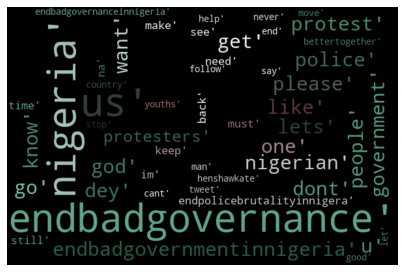

In [21]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/Lekki-20-10-20.jpg"))
wordcloud_spa = WordCloud(background_color="black", mask=mask).generate(word)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('EndSars_WordCloud_figures')
plt.show()

In [22]:
#Sentiment Analysis
#Analyse sentiment in tweets 
def Sentiments(tweets):
    # Create textblob objects of the tweets without urls
    sentiment_objects = [TextBlob(tweet) for tweet in tweets]
    sentiment_objects[0].polarity, sentiment_objects[0]
    
    #Create a list of the polarity values and text for each tweet, and then create a Pandas Dataframe from the list.
    #Create list of polarity valuesx and tweet text
    sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
    sentiment_values[0]
    
    #Create dataframe containing the polarity value and tweet text
    sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
    sentiment_df.head()
    sentiment_df.to_csv('/Users/olufeyijimiayinde/Desktop/MSC/MANCHESTER/COURSE WORK/Semester 1/Programming in Python/SARSsentiment.csv') 
    
    #For better polarity view, remove polarity values = 0
    #Remove polarity values equal to zero
    sentiments_df = sentiment_df[sentiment_df.polarity != 0]

    fig, ax = plt.subplots(figsize=(8, 6))
    
    #Plot histogram with break at zero
    sentiments_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
                 ax=ax,
                 color="olive")
    plt.xlabel('Polarity Score')
    plt.ylabel('Tweet Count')    
    plt.title("ENDSARS/POLICE BRUTALITY Tweets")
    plt.savefig('EndSarsSentiment_figure')
    plt.show()   
    pass

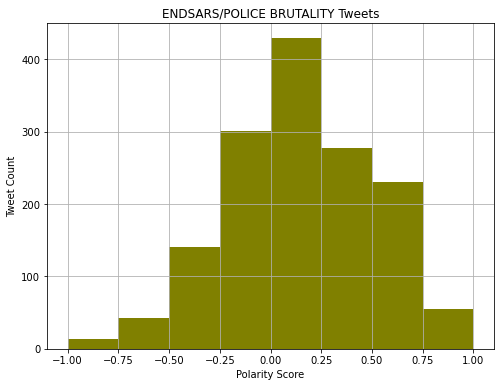

In [23]:
Sentiments(tweets_no_urls)